In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf
import talib 

In [58]:
df = pd.read_csv("../Data/yfinance_data/AAPL_historical_data.csv")



In [43]:
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


In [59]:
#CONVERTING THE DATE COLUMN TO DATETIME
df['Date'] = pd.to_datetime(df['Date'])

df["Date"].head()

df.describe()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
mean,2002-09-26 14:14:28.085106304,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
min,1980-12-12 00:00:00,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,1991-10-28 06:00:00,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,2002-09-23 12:00:00,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,2013-08-25 06:00:00,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000
max,2024-07-30 00:00:00,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000
std,NaN,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663


In [60]:
df = df.sort_values('Date')
df["Date"].head()
df['Date'].tail()


10993   2024-07-24
10994   2024-07-25
10995   2024-07-26
10996   2024-07-29
10997   2024-07-30
Name: Date, dtype: datetime64[ns]

In [61]:
# Convert to numpy arrays for TA-Lib (which works best with numpy)
open_prices = np.array(df['Open'])
high_prices = np.array(df['High'])
low_prices = np.array(df['Low'])
close_prices = np.array(df['Close'])
volume = np.array(df['Volume'])

In [62]:
# Simple Moving Average (SMA) - 20 period
df['SMA_20'] = talib.SMA(close_prices, timeperiod=20)

# Exponential Moving Average (EMA) - 20 period
df['EMA_20'] = talib.EMA(close_prices, timeperiod=20)

# You can calculate for different periods
df['SMA_50'] = talib.SMA(close_prices, timeperiod=50)
df['SMA_200'] = talib.SMA(close_prices, timeperiod=200)

In [63]:
# RSI - 14 period (standard)
df['RSI_14'] = talib.RSI(close_prices, timeperiod=14)

# You can try different periods
df['RSI_7'] = talib.RSI(close_prices, timeperiod=7)
df['RSI_21'] = talib.RSI(close_prices, timeperiod=21)

In [64]:
# Bollinger Bands - standard 20 period with 2 standard deviations
upper, middle, lower = talib.BBANDS(close_prices, 
                                    timeperiod=20,
                                    nbdevup=2,  # upper band standard deviations
                                    nbdevdn=2,  # lower band standard deviations
                                    matype=0)  # 0 = SMA, 1 = EMA, etc.

df['BB_upper'] = upper[-len(df):]
df['BB_middle'] = middle[-len(df):]
df['BB_lower'] = lower[-len(df):]

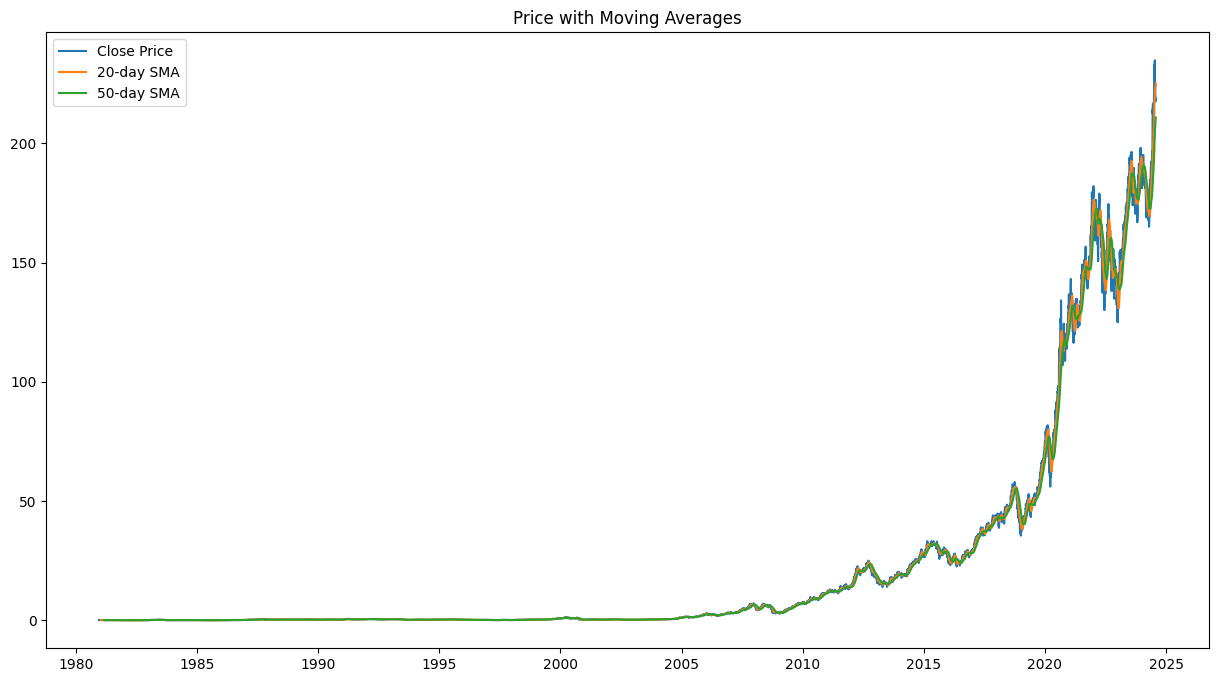

In [65]:

plt.figure(figsize=(15, 8))

# Plot close price and moving averages
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['SMA_20'], label='20-day SMA')
plt.plot(df['Date'], df['SMA_50'], label='50-day SMA')
plt.legend()
plt.title('Price with Moving Averages')
plt.show()



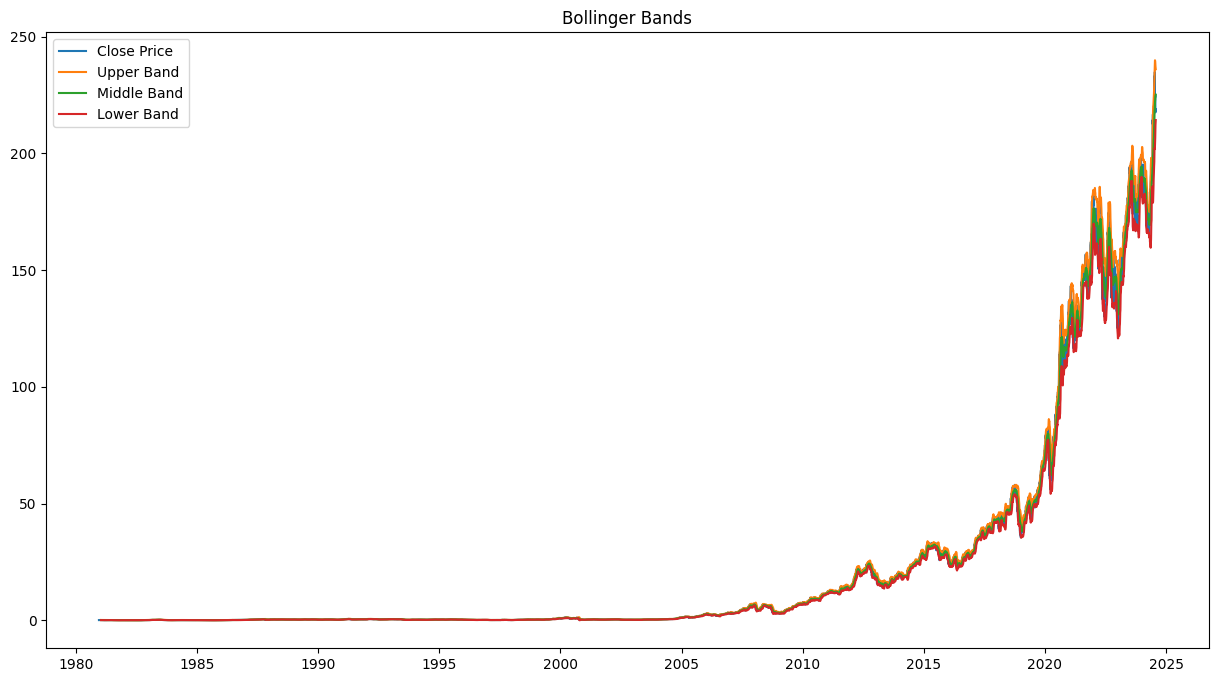

In [66]:
# Plot Bollinger Bands
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['BB_upper'], label='Upper Band')
plt.plot(df['Date'], df['BB_middle'], label='Middle Band')
plt.plot(df['Date'], df['BB_lower'], label='Lower Band')
plt.fill_between(df['Date'], df['BB_lower'], df['BB_upper'], alpha=0.1)
plt.legend()
plt.title('Bollinger Bands')
plt.show()


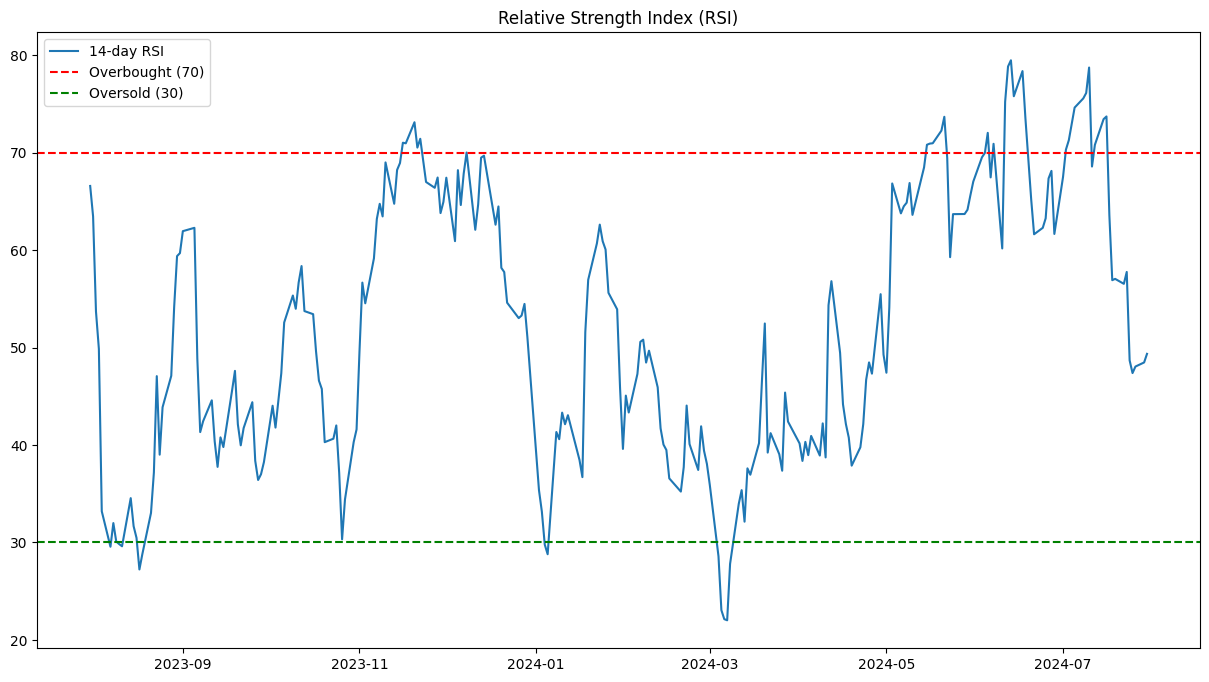

In [67]:

# Plot RSI for last year
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= (df['Date'].max() - pd.Timedelta(days=365))]
plt.figure(figsize=(15, 8)) 
plt.plot(df['Date'], df['RSI_14'], label='14-day RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.legend()
plt.title('Relative Strength Index (RSI)')
plt.show()